# crop recommedation system

# problem statement
the objective of the project is to predict the types of crops to be planted based on different factors suh as rainfal,soil,temperature etc

# Tools for preparation
pandas for loading the dataset and data analysis

numpy for working with arrays

matplotlib and seaborn for visualization

randomforest for building a model

metrics for evaluating the performance of the model

# import the libraries

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# loading the dataset

In [7]:
#printing the first fve rows
df=pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
#getting the last ten rows
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# data analysis

In [9]:
#getting the shape of the data
df.shape

(2200, 8)

In [10]:
#getting the column names
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
#checking for null values
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [13]:
#getting the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
#getting the statistical data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
#renaming the first three columns
data=df.rename(columns={'N':'nitrogen in soil','P':'phosphorous in soil','K':'calcium in soil'})
data.head()

,nitrogen in soil,phosphorous in soil,calcium in soil,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
#getting the value counts of the label
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# data visualization

In [25]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

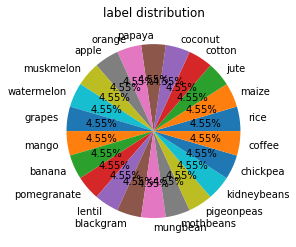

In [26]:
#the label distribution
plt.pie(x = data['label'].value_counts() ,autopct='%1.2f%%' ,labels=data['label'].value_counts().index)
plt.title('label distribution')
plt.show

Text(0.5, 1.0, 'rainfal distribution')

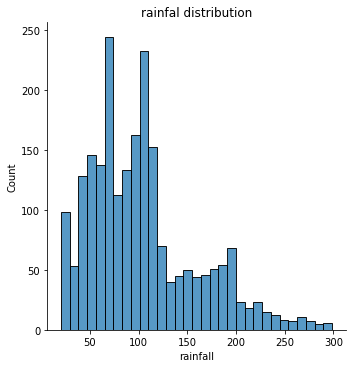

In [36]:
#rainfal distribution
sns.displot(data["rainfall"])
plt.title("rainfal distribution")

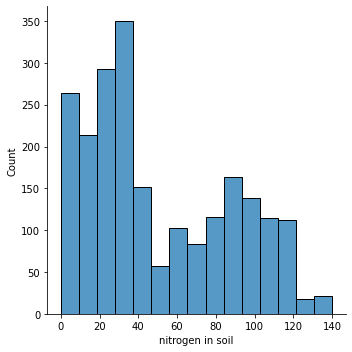

In [35]:
#nitrogen in soil distribution
sns.displot(data['nitrogen in soil'])

Text(0.5, 1.0, 'phosphorous in soil')

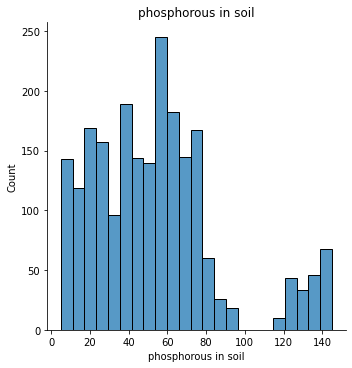

In [34]:
#the distribution in phospohrous in soil
sns.displot(data["phosphorous in soil"])
plt.title("phosphorous in soil")

Text(0.5, 1.0, 'temperature distribution')

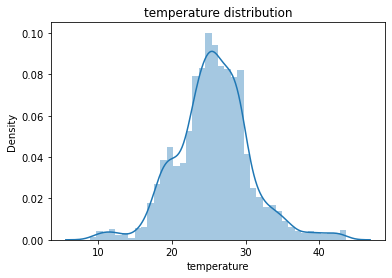

In [40]:
#temperature distribution
sns.distplot(data['temperature'])
plt.title("temperature distribution")

Text(0.5, 1.0, 'humidity distribution')

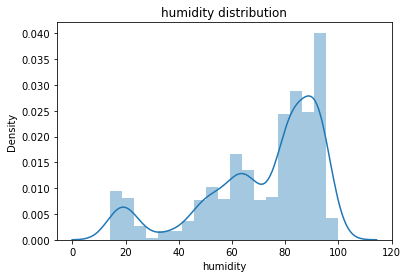

In [41]:
#humidity distribution
sns.distplot(data['humidity'])
plt.title("humidity distribution")

Text(0.5, 1.0, 'ph distribution')

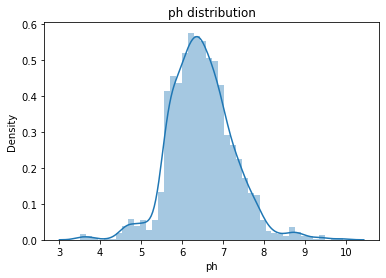

In [42]:
sns.distplot(data['ph'])
plt.title("ph distribution")

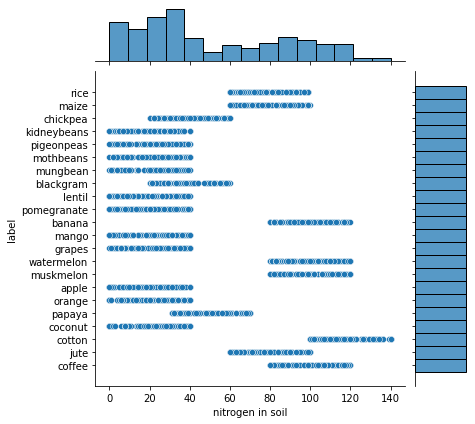

In [56]:
#joinplot
sns.jointplot(data=data,x="nitrogen in soil",y="label")

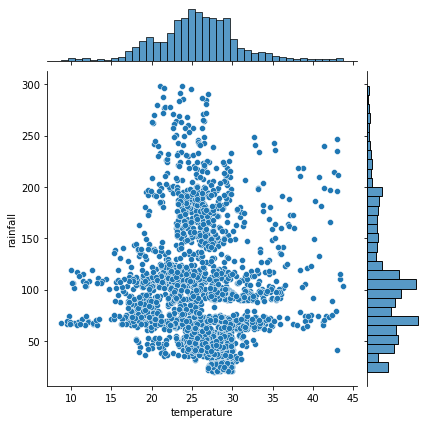

In [53]:
#the relationship between temperature an dthe rainfal
sns.jointplot(data=data,x="temperature",y="rainfall")

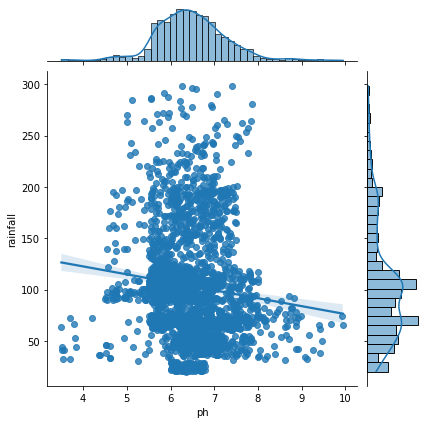

In [62]:
#the relationship between temperature an dthe rainfal
sns.jointplot(data=data,x="ph",y="rainfall",kind='reg')

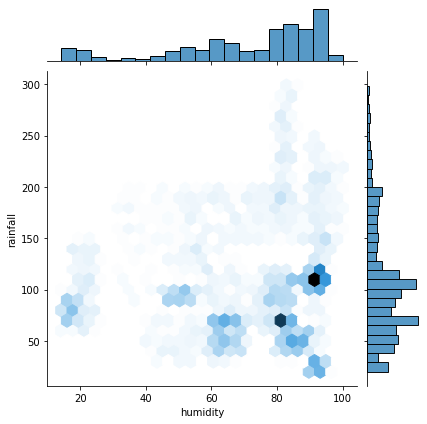

In [61]:
sns.jointplot(data=data,x="humidity",y="rainfall",kind='hex')

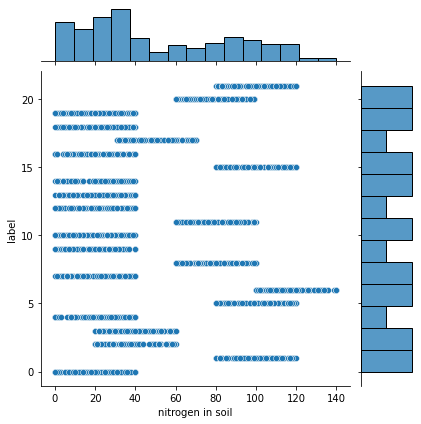

In [71]:
sns.jointplot(data=data,x="nitrogen in soil",y="label")

# data preprocessing

In [66]:
#encoding the labels
encode=LabelEncoder()
data["label"]=encode.fit_transform(data["label"])
data.head(10)

,nitrogen in soil,phosphorous in soil,calcium in soil,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20


In [84]:
data["label"].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [67]:
data.tail(10)

,nitrogen in soil,phosphorous in soil,calcium in soil,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,5
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,5
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,5
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,5
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,5
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,5


# correlation

<AxesSubplot:>

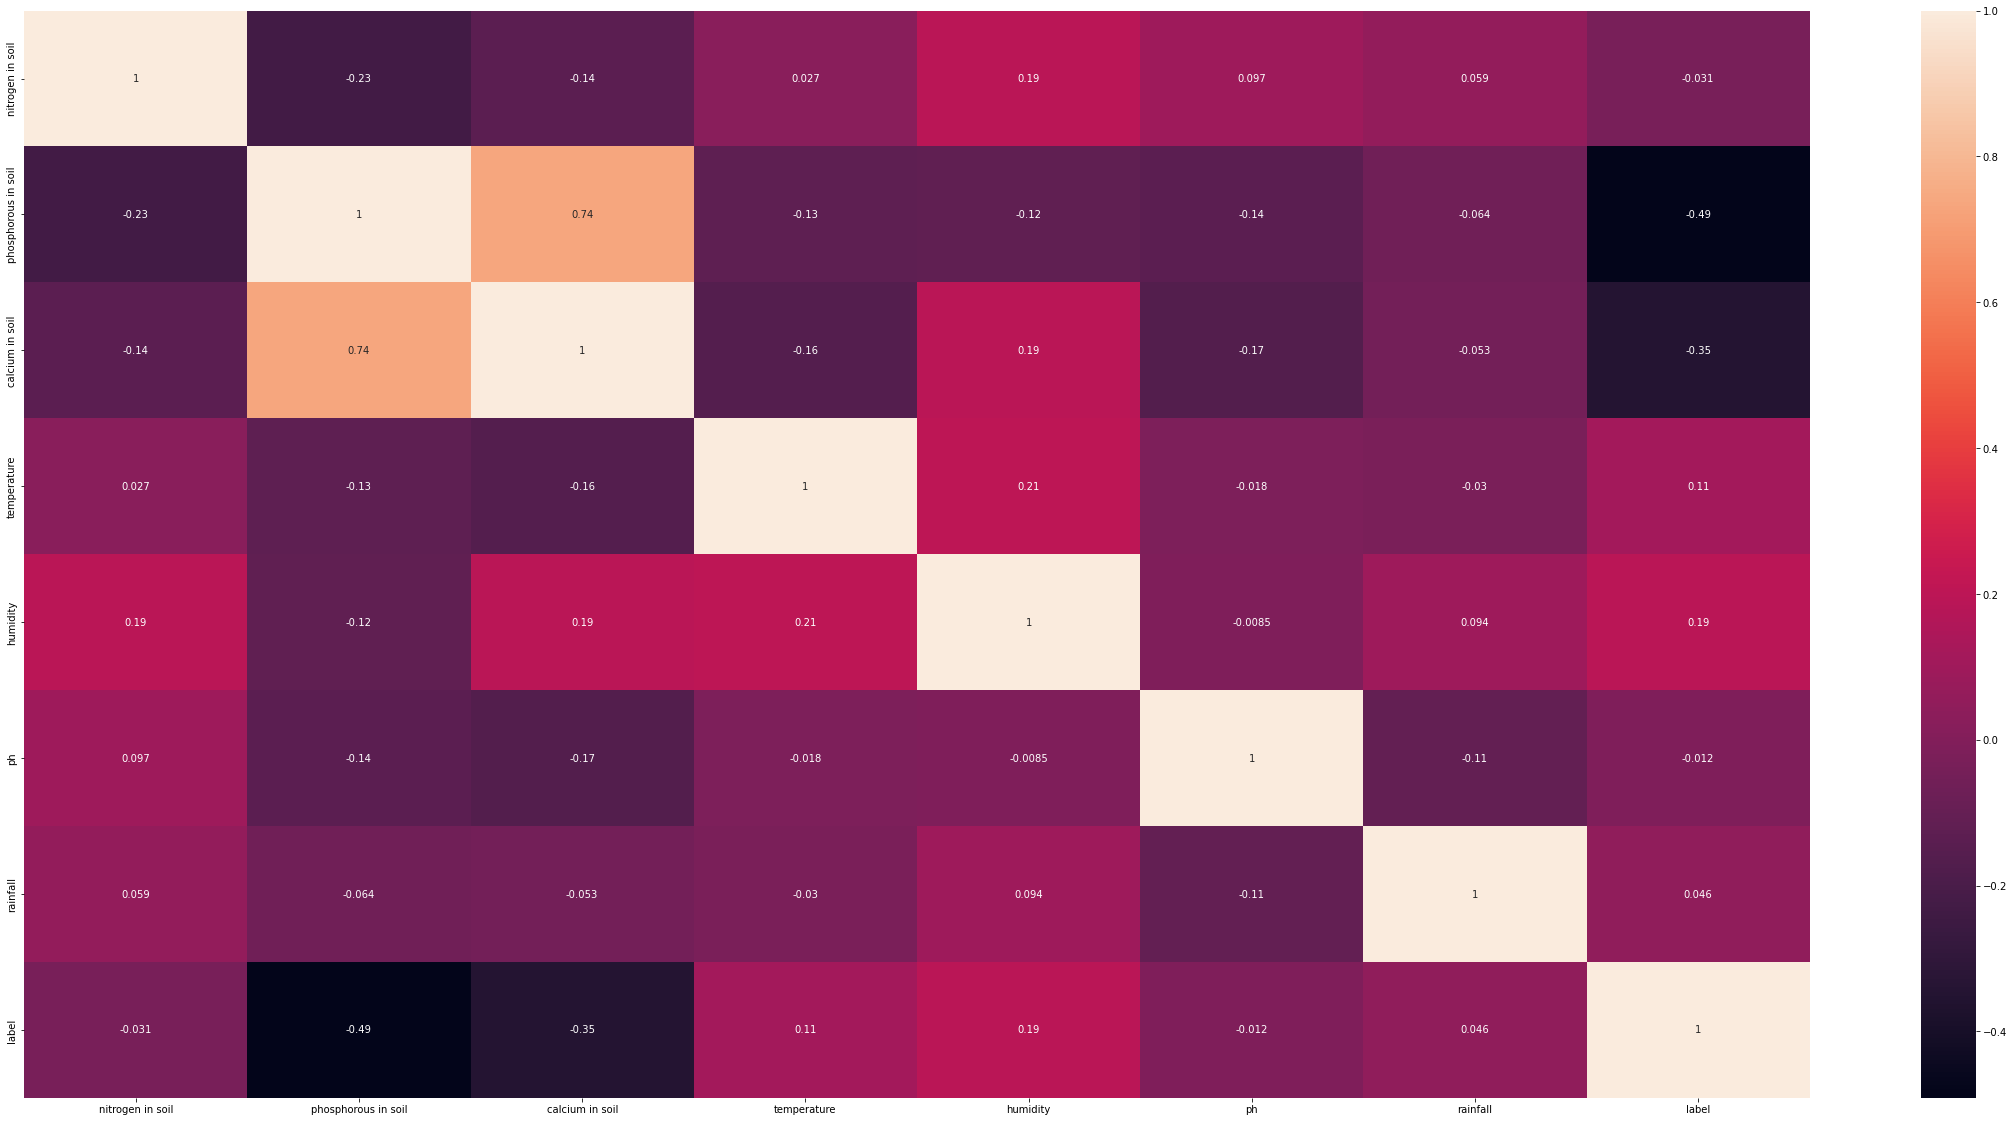

In [68]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),annot=True)

# spliting the data

In [72]:
x=data.drop(["label"],axis=1)
y=data["label"]

In [74]:
print("the shape of x is:", x.shape)
print("the shape odf y is:", y.shape)

the shape of x is: (2200, 7)
the shape odf y is: (2200,)


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# building the model using random forest

In [76]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

# model evaluation

In [77]:
pred=rf.predict(x_test)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        16
           8       0.84      1.00      0.91        16
           9       1.00      1.00      1.00        18
          10       0.96      1.00      0.98        27
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        19
          13       1.00      0.95      0.98        21
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        28
          17       1.00    

In [79]:
print(accuracy_score(y_test,pred)*100)

99.0909090909091
